<a href="https://colab.research.google.com/github/dolmani38/ai_corona/blob/master/ai_corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!nvidia-smi

Thu Apr 30 11:25:17 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
#공개된 Roaming Dataset을 읽고, 중간 중간 나온것을 합친다.
rm1 = pd.read_csv("https://raw.githubusercontent.com/dolmani38/ai_corona/master/corona_contest_data_0406/Roaming_data.csv",encoding="utf-8")
rm2 = pd.read_csv("https://raw.githubusercontent.com/dolmani38/ai_corona/master/corona_contest_data_0429/Roaming_data.csv",encoding="utf-8")
rm = pd.concat([rm1, rm2], ignore_index=True, sort=False)

In [86]:
# 합친 Dataset의 내용 확인
rm

,return,iso,arrival,departure,count
0,20200131,ad,20200130,20200130,3
1,20200131,ae,20191231,20200125,3
2,20200131,ae,20191231,20200131,3
3,20200131,ae,20200102,20200102,3
4,20200131,ae,20200104,20200131,3
...,...,...,...,...,...
217800,20200401,vn,20200330,20200401,3
217801,20200401,vn,20200331,20200331,20
217802,20200401,vn,20200331,20200401,6
217803,20200401,vn,20200401,20200401,45


In [0]:
#도착일을 기준으로 입국자(로밍등록자)를 합산한다.
ar = pd.DataFrame(rm.groupby('arrival')['count'].sum())
ar['date'] =  ar.index.astype('object')
#date column을 datetime 으로 casting 한다.
ar['date'] =  pd.to_datetime(ar['date'], format='%Y%m%d')

In [88]:
# 날자별 입국자(로밍등록자) 정리 dataset 확인
ar

,count,date
arrival,,
20191031,91,2019-10-31
20191101,36,2019-11-01
20191102,120,2019-11-02
20191103,159,2019-11-03
20191104,179,2019-11-04
...,...,...
20200424,711,2020-04-24
20200425,463,2020-04-25
20200426,447,2020-04-26


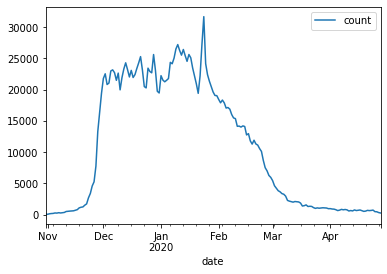

In [89]:
# 입국자 추세 chart 확인
ar.plot(x='date',y='count')

In [52]:
# 이건... 어떻게 해야 할지 모르겠음...
# iso별 count를 재배열하여 feature의 개수를 증가 시킬려 하나... Dataframe 조작을 못하겠음...
iso = rm['iso'].unique()
iso

array(['ad', 'ae', 'af', 'am', 'ao', 'ar', 'at', 'au', 'az', 'ba', 'bd',
       'be', 'bg', 'bh', 'bn', 'bo', 'br', 'bw', 'by', 'ca', 'ch', 'cl',
       'cn', 'co', 'cy', 'cz', 'de', 'dk', 'dz', 'ec', 'ee', 'eg', 'es',
       'et', 'fi', 'fj', 'fr', 'ga', 'gb', 'ge', 'gh', 'gr', 'gu', 'hk',
       'hr', 'ht', 'hu', 'id', 'ie', 'il', 'in', 'iq', 'ir', 'it', 'jm',
       'jo', 'jp', 'ke', 'kg', 'kh', 'kw', 'kz', 'la', 'lk', 'ls', 'lt',
       'lu', 'lv', 'ma', 'mc', 'me', 'mk', 'mm', 'mn', 'mo', 'mp', 'mt',
       'mu', 'mv', 'mx', 'my', 'mz', nan, 'na', 'ng', 'ni', 'nl', 'no',
       'np', 'nz', 'om', 'pa', 'pe', 'pg', 'ph', 'pk', 'pl', 'ps', 'pt',
       'py', 'qa', 'ro', 'rs', 'ru', 'rw', 'sa', 'sc', 'sd', 'se', 'sg',
       'si', 'sk', 'sr', 'sv', 'th', 'tm', 'tr', 'tw', 'tz', 'ug', 'us',
       'uy', 'uz', 'vn', 'za', 'zm', 'zw', 'al', 'bz', 'cr', 'gt', 'hn',
       'is', 'lb', 'md', 'tk', 'ua', 'li', 'mg', 'an', 'do', 'pr', 'to',
       'tt', 'cm', 'pf', 'tg', 'tn', 'vu', 'bj', 'bt

In [53]:
# 일단 pass..
ar_iso = pd.DataFrame(rm.groupby(['arrival','iso'])['count'].sum())
ar_iso

count
arrival  iso       
20191031 ae       3
         at       3
         cn      20
         de       3
         hk       6
...             ...
20200428 th      13
         tw       5
         us      13
         uy       3
         vn      25

[15358 rows x 1 columns]

In [54]:
# 일단 pass..
ts = pd.DataFrame()
date = None
for row in ar_iso.iterrows():
    ts['date'] = row[0][0]
    ts[row[0][1]] = row[1][0]
    
ts

,date,ae,at,cn,de,hk,jp,kh,kw,la,mm,my,no,pe,ph,pl,th,us,vn,hu,ma,mn,au,ch,fr,gb,in,iq,lk,qa,sg,uz,cz,dk,es,fi,id,nz,ru,sa,...,tl,tp,vu,zw,rs,tk,ug,bz,bo,cy,na,pg,rw,bt,lr,mz,pr,tg,mk,an,cv,tt,md,ad,ga,gn,re,ky,bf,bj,cf,tc,ls,td,mr,to,ws,gm,ye,ml


In [0]:
# 뉴스 기사 정보를 읽어서... 나뉘어 있는 Dataset을 합친다.
ns1 = pd.read_excel("https://raw.githubusercontent.com/dolmani38/ai_corona/master/corona_contest_data_0406/NewsList.xls")
ns2 = pd.read_excel("https://raw.githubusercontent.com/dolmani38/ai_corona/master/corona_contest_data_0429/NewsList.xls")
ns =pd.concat([ns1, ns2], ignore_index=True, sort=False)

In [91]:
# 뉴스 dataset의 내용 확인 
ns

,파일명,제목,URL,수집일자,게시일자,채널명,감염병명,분류명
0,AFRO2019120200003,WHO supports Angola’s Government efforts to en...,https://www.afro.who.int/news/who-supports-ang...,2019-12-02 21:00:16.0,2019-12-02 00:00:00,AFRO,Poliomyelitis,Viral
1,AFRO2019120300001,African First Ladies laud progress against HIV...,https://www.afro.who.int/news/african-first-la...,2019-12-03 00:00:17.0,2019-12-02 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
2,AFRO2019120300002,Eritrea Observed World AIDS Day 2019,https://www.afro.who.int/news/eritrea-observed...,2019-12-03 00:00:18.0,2019-12-02 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
3,AFRO2019120400003,West and Central Africa Expands Access to HIV ...,https://www.afro.who.int/news/west-and-central...,2019-12-04 03:00:14.0,2019-12-03 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
4,AFRO2019120400004,Nearly 23 million voluntary male medical circu...,https://www.afro.who.int/news/nearly-23-millio...,2019-12-04 22:00:14.0,2019-12-04 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
...,...,...,...,...,...,...,...,...
103822,XWFB2020040900020,"Ching Ming remembrance, home country forever! ...",http://wsjkw.sh.gov.cn/xwfb/20200404/2f54e0e14...,2020-04-09 16:05:21.0,2020-04-04 00:00:00,Shanghai Municioal Health Commission,COVID-19,Viral
103823,ZWYW2020041000002,Guangdong Provincial Health Commission notifie...,http://wsjkw.gd.gov.cn/zwyw_yqxx/content/post_...,2020-04-10 18:00:45.0,2020-04-10 00:00:00,Health Commission of Guangdong Province,Dengue fever,Viral
103824,ZWYW2020041500002,Guangdong Provincial Health Commission announc...,http://wsjkw.gd.gov.cn/zwyw_yqxx/content/post_...,2020-04-15 23:01:04.0,2020-04-15 00:00:00,Health Commission of Guangdong Province,Influenza,Viral
103825,ZWYW2020041500003,Guangdong Provincial Health Commission release...,http://wsjkw.gd.gov.cn/zwyw_yqxx/content/post_...,2020-04-15 23:01:13.0,2020-04-15 00:00:00,Health Commission of Guangdong Province,Influenza,Viral


In [92]:
# COVID-19 만 select 해서...
cov_news = ns.loc[ns['감염병명'] == 'COVID-19']
# '게시일'만 기준으로 하기위해 시간은 잘라 낸다.
cov_news['게시일자'] =  cov_news['게시일자'].str[:10]
#그리고 buzz count를 게시일자 기준으로 groupby 한다.
cov_news = pd.DataFrame(cov_news.groupby('게시일자')['감염병명'].count())
#로밍정보와 시기를 맞춘다.
cov_news = cov_news.loc[cov_news.index >= '2019-10-31']
cov_news['date'] = pd.to_datetime(cov_news.index, format='%Y-%m-%d')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [93]:
# 뉴스 버즈 정리 dataset 확인 
cov_news = cov_news.rename(columns={"감염병명":"buz_count"})
cov_news

,buz_count,date
게시일자,,
2019-12-01,1,2019-12-01
2019-12-14,2,2019-12-14
2019-12-30,3,2019-12-30
2019-12-31,5,2019-12-31
2020-01-02,1,2020-01-02
...,...,...
2020-04-26,1176,2020-04-26
2020-04-27,1353,2020-04-27
2020-04-28,999,2020-04-28


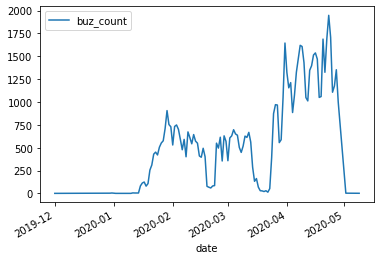

In [94]:
# 뉴스 버즈 추세 chart 확인.
cov_news.plot(x='date',y='buz_count')

In [0]:
# 입국자 dataset과 뉴스 버즈 dataset을 날짜 기준으로 Join 시킨다.
raw_ds = ar.set_index('date').join(cov_news.set_index('date'))
raw_ds = raw_ds.rename(columns={'count':'arrival_count'})
raw_ds.index = pd.to_datetime(raw_ds.index, format='%Y-%m-%d')
# Join에 의해 발생된 NaN은 0으로 채운다.
raw_ds['buz_count'].fillna(0, inplace=True)

In [62]:
raw_ds

,arrival_count,buz_count
date,,
2019-10-31,91,0.0
2019-11-01,36,0.0
2019-11-02,120,0.0
2019-11-03,159,0.0
2019-11-04,179,0.0
...,...,...
2020-04-24,711,1708.0
2020-04-25,463,1107.0
2020-04-26,447,1176.0


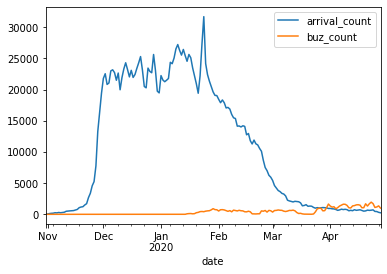

In [96]:
# 입국자, 뉴스 버즈 추세 chart 확인.
raw_ds.plot(y=['arrival_count','buz_count'])

In [0]:
#  입국자, 뉴스 버즈에 대해 2주 (14일) 평균 추세 추가.
raw_ds['arrival_14ma'] = raw_ds['arrival_count'].rolling(window=14, min_periods=0).mean()
raw_ds['news_14ma'] = raw_ds['buz_count'].rolling(window=14, min_periods=0).mean()


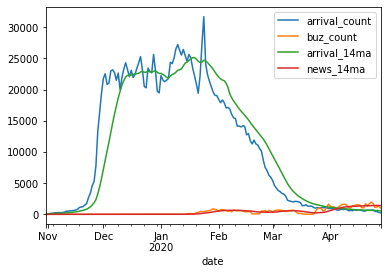

In [65]:
raw_ds.plot()

In [0]:
import numpy as np

# Time-series CNN을 적용하기 위한 전처리
# 1D Convolution을 적용하기 위해..
# window를 2주(14일)로 설정 -> 그냥 잡은 수치
window = 7*2
#위의 차트에서 보는바와 같이 4개의 vector 사용
size = 4
#1일 후 예측
forecast = 1

data = raw_ds.to_numpy()
train_x = []
train_y = []

for i in range(data.shape[0]-window-forecast):
    sub = []
    for j in range(window):
        sub.append(data[i+j,:])
    train_x.append(sub)
    train_y.append(data[i + window + forecast-1][0])

#train_x ,train_y의 준비
train_x = np.asarray(train_x)
train_x = train_x.reshape(-1,window,size)
train_y = np.asarray(train_y)

In [99]:
#train_x ,train_y의 내용 확인.
train_x, train_y

(array([[[  91.        ,    0.        ,   91.        ,    0.        ],
         [  36.        ,    0.        ,   63.5       ,    0.        ],
         [ 120.        ,    0.        ,   82.33333333,    0.        ],
         ...,
         [ 487.        ,    0.        ,  227.66666667,    0.        ],
         [ 520.        ,    0.        ,  250.15384615,    0.        ],
         [ 551.        ,    0.        ,  271.64285714,    0.        ]],
 
        [[  36.        ,    0.        ,   63.5       ,    0.        ],
         [ 120.        ,    0.        ,   82.33333333,    0.        ],
         [ 159.        ,    0.        ,  101.5       ,    0.        ],
         ...,
         [ 520.        ,    0.        ,  250.15384615,    0.        ],
         [ 551.        ,    0.        ,  271.64285714,    0.        ],
         [ 567.        ,    0.        ,  305.64285714,    0.        ]],
 
        [[ 120.        ,    0.        ,   82.33333333,    0.        ],
         [ 159.        ,    0.        ,  10

In [100]:
# model 생성...
# 이게 최적의 layer 구성인지는 모름... 일반적/직관적으로 layer 설정 
import keras
from keras.layers import Dense, Activation, Flatten, Conv1D, MaxPooling1D
from keras.models import Sequential

model = Sequential()
model.add(Conv1D(128,4, input_shape=(window, size),padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(64, 4,padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(32, 4,padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(1))
model.add(Activation('linear'))

model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(),metrics=['mae'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 14, 128)           2176      
_________________________________________________________________
activation_5 (Activation)    (None, 14, 128)           0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 7, 128)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 7, 64)             32832     
_________________________________________________________________
activation_6 (Activation)    (None, 7, 64)             0         
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 3, 64)             0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 3, 32)            

In [101]:
#학습 시작...
hist = model.fit(train_x, train_y, epochs=1000,verbose=1)

Epoch 1/1000
166/166 [==============================] - 0s 1ms/step - loss: 57499609.9277 - mae: 5211.4961
Epoch 2/1000
166/166 [==============================] - 0s 209us/step - loss: 25308692.6867 - mae: 3657.4849
Epoch 3/1000
166/166 [==============================] - 0s 201us/step - loss: 13429957.1837 - mae: 2365.3862
Epoch 4/1000
166/166 [==============================] - 0s 195us/step - loss: 9136300.2651 - mae: 2089.4873
Epoch 5/1000
166/166 [==============================] - 0s 210us/step - loss: 7672895.9217 - mae: 1714.0789
Epoch 6/1000
166/166 [==============================] - 0s 211us/step - loss: 5652829.5166 - mae: 1584.5482
Epoch 7/1000
166/166 [==============================] - 0s 202us/step - loss: 4473453.0602 - mae: 1345.5878
Epoch 8/1000
166/166 [==============================] - 0s 200us/step - loss: 5081602.2786 - mae: 1482.4607
Epoch 9/1000
166/166 [==============================] - 0s 207us/step - loss: 5520718.3373 - mae: 1499.0829
Epoch 10/1000
166/166 [====

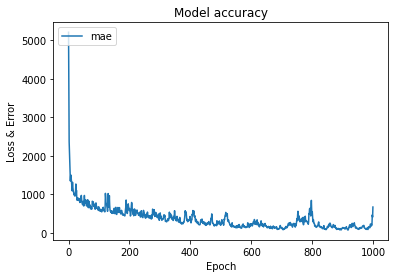

In [104]:
# 학습에 대한 accuracy 확인.
#plt.plot(np.asarray(hist.history['loss'])/1000)
plt.plot(hist.history['mae'])
plt.title('Model accuracy')
plt.ylabel('Loss & Error')
plt.xlabel('Epoch')
plt.legend(['mae'], loc='upper left')
plt.show()

In [0]:
# 모델에 의한 예측 입국자 count를 과거 Dataset에 적용
predit_y = model.predict(train_x)
predit_y = predit_y.ravel()

In [106]:
# window에 의해 차이나는 부분의 보정 처리...
predit_y = np.concatenate((np.zeros(window+ forecast), predit_y), axis=0)
print(data.shape)
print(predit_y.shape)

(181, 4)
(181,)


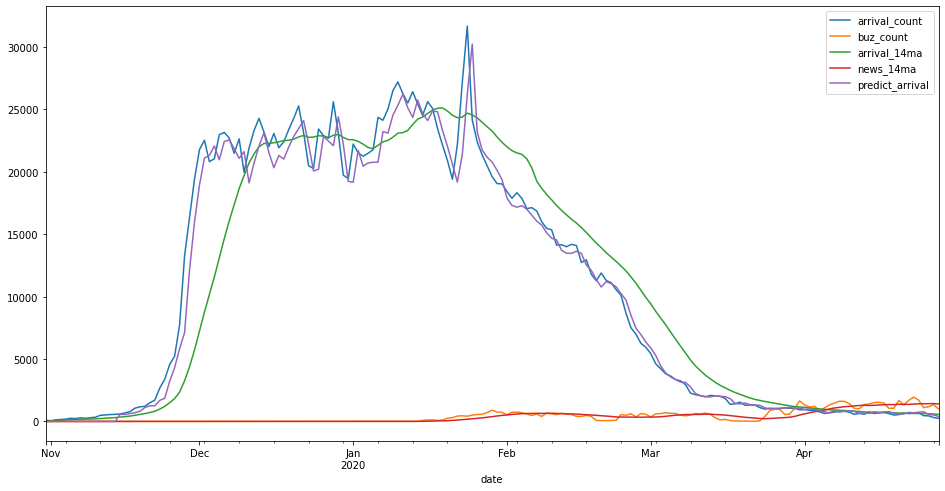

In [107]:
# 예측치를 chart에 같이 그려서 확인
raw_ds['predict_arrival'] = predit_y
raw_ds.plot(figsize=(16,8))
# 예측치가 overfit 되어 보이기도...

In [108]:
raw_ds

,arrival_count,buz_count,arrival_14ma,news_14ma,predict_arrival
date,,,,,
2019-10-31,91,0.0,91.000000,0.000000,0.000000
2019-11-01,36,0.0,63.500000,0.000000,0.000000
2019-11-02,120,0.0,82.333333,0.000000,0.000000
2019-11-03,159,0.0,101.500000,0.000000,0.000000
2019-11-04,179,0.0,117.000000,0.000000,0.000000
...,...,...,...,...,...
2020-04-24,711,1708.0,638.071429,1413.857143,734.134766
2020-04-25,463,1107.0,630.642857,1418.000000,781.491882
2020-04-26,447,1176.0,616.785714,1429.714286,555.796936


In [109]:
#1일 후인 2020-04-29의 예측
# 마지막 14일치 정보를 input으로...
test_x = raw_ds.iloc[raw_ds.shape[0] - window:raw_ds.shape[0],0:4].to_numpy()
test_x = test_x.reshape(-1,window,size)
predit_y = model.predict(test_x)
predit_y = predit_y.ravel()
# 로밍등록자는 실 입국자의 약 24%에 해당되므로.. 이를 보정 처리 한다.
print('============================================================')
print('arrival count prediction at 2020-04-29:',int(predit_y[0] * 100/24))
print('============================================================')


arrival count prediction at 2020-04-29: 2612


In [110]:
!pip install lime

#lime에 의해 Feature의 영향요소 확인
from lime import lime_tabular, lime_text
fn = np.asarray([['arrival_count_'+str(i),'buz_count_'+str(i),'arrival_14ma_'+str(i),'news_14ma_'+str(i)] for i in range(window)]).reshape(window*size)


In [111]:
fn

array(['arrival_count_0', 'buz_count_0', 'arrival_14ma_0', 'news_14ma_0',
       'arrival_count_1', 'buz_count_1', 'arrival_14ma_1', 'news_14ma_1',
       'arrival_count_2', 'buz_count_2', 'arrival_14ma_2', 'news_14ma_2',
       'arrival_count_3', 'buz_count_3', 'arrival_14ma_3', 'news_14ma_3',
       'arrival_count_4', 'buz_count_4', 'arrival_14ma_4', 'news_14ma_4',
       'arrival_count_5', 'buz_count_5', 'arrival_14ma_5', 'news_14ma_5',
       'arrival_count_6', 'buz_count_6', 'arrival_14ma_6', 'news_14ma_6',
       'arrival_count_7', 'buz_count_7', 'arrival_14ma_7', 'news_14ma_7',
       'arrival_count_8', 'buz_count_8', 'arrival_14ma_8', 'news_14ma_8',
       'arrival_count_9', 'buz_count_9', 'arrival_14ma_9', 'news_14ma_9',
       'arrival_count_10', 'buz_count_10', 'arrival_14ma_10',
       'news_14ma_10', 'arrival_count_11', 'buz_count_11',
       'arrival_14ma_11', 'news_14ma_11', 'arrival_count_12',
       'buz_count_12', 'arrival_14ma_12', 'news_14ma_12',
       'arrival_cou

In [0]:
lime_explainer = lime_tabular.LimeTabularExplainer(train_x.reshape(-1, window*size),
        training_labels=train_y,
        feature_names=fn,
        class_names=['arrival_count'] ,
        mode='regression')

In [0]:
test_x = test_x.reshape(window*size)

def predict(data):
    data = data.reshape(-1,window,size)
    return model.predict(data)

exp = lime_explainer.explain_instance(test_x, predict, num_features=20)

In [114]:
exp.show_in_notebook(show_table=True)
#로밍등록자 14일 추세 vector가 주요한 성분으로 쓰였음을 확인... 